 # Project 3 - Ensemble Techniques

## Data Description:   
##### The data is related with direct marketing campaigns of a  Portuguese banking institution. The marketing campaigns  were based on phone calls. Often, more than one contact to  the same client was required, in order to access if the product  (bank term deposit) would be ('yes') or not ('no') subscribed.   

## Domain:   
##### Banking  

## Context:  
##### Leveraging customer information is paramount for most  businesses. In the case of a bank, attributes of customers like  the ones mentioned below can be crucial in strategizing a  marketing campaign when launching a new product.  

## Attribute Information: 

* age (numeric)  
* job : type of job (categorical:  'admin.','blue-collar','entrepreneur','housemaid','manage ment','retired','self-employed','services','student','technicia n','unemployed','unknown')  
* marital : marital status (categorical:  'divorced','married','single','unknown'; note: 'divorced'  means divorced or widowed)  
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','profes sional.course','university.degree','unknown') 
* default: has credit in default? (categorical:  'no','yes','unknown')  
* balance: average yearly balance, in euros (numeric)  
* housing: has housing loan? (categorical:  'no','yes','unknown')  
* loan: has personal loan? (categorical: 'no','yes','unknown')  
* contact: contact communication type (categorical:  'cellular','telephone')  
* day: last contact day of the month (numeric 1 -31)  
* month: last contact month of year (categorical: 'jan', 'feb',  'mar', ..., 'nov', 'dec')  
*  duration: last contact duration, in seconds (numeric).  Important note: this attribute highly affects the output  target (e.g., if duration=0 then y='no'). Yet, the duration is  not known before a call is performed. Also, after the end  of the call y is obviously known. Thus, this input should  only be included for benchmark purposes and should be  discarded if the intention is to have a realistic predictive  model.  
*  campaign: number of contacts performed during this  campaign and for this client (numeric, includes last  contact)  
*  pdays: number of days that passed by after the client  was last contacted from a previous campaign (numeric;  999 means client was not previously contacted)  
* previous: number of contacts performed before this  campaign and for this client (numeric)  
*  poutcome: outcome of the previous marketing  campaign (categorical: 'failure','nonexistent','success')  
* target: has the client subscribed a term deposit? (binary:  "yes","no") 

## Steps Involved:  
* Exploratory Data Analysis  
* Preparing the data to train a model  
* Training and making predictions using an Ensemble  Model  
* Tuning an Ensemble model    

## Objective  
##### The classification goal is to predict if a potential client will subscribe  (yes/no) a term deposit (variable y).  

# Importing required python packages

In [1]:
# *** Basic required packages ***
import numpy as np                  # numpy for array data manipulation
import pandas as pd                 # import pandas
import seaborn as sns               # import seaborn
import matplotlib.pyplot as plt     # import pyplot
# to avoid the userwarning from the non-GUI backend module of ipykernel - @ - fig.show()
#%matplotlib notebook

from scipy.stats import pearsonr    # for checking pearson's correlation among the dataset

# *** Packages for preprocessing and testing ***
from sklearn.model_selection import train_test_split                       # for splitting the data in train and test sets
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler # for having various scaling method options
from sklearn.linear_model import LogisticRegression                        # for LogisticRegression
from sklearn.naive_bayes import GaussianNB                                 # for NaiveBayes
from sklearn.neighbors import KNeighborsClassifier                         # for KNN
from sklearn.svm import SVC                                                # for Support vector classifier 


from os import system                           # for the access to directories and files
from sklearn.preprocessing import LabelEncoder  # for lebel encoder (Converting catogorical String values to numerals)


# *** Advanced packages for creating classification models ***
from sklearn.tree import DecisionTreeClassifier


# *** Some ensemble packages ***
from sklearn.ensemble import BaggingClassifier          # for bagging classifier
from sklearn.ensemble import AdaBoostClassifier         # for adaptive boosting
from sklearn.ensemble import GradientBoostingClassifier # for gradient boosting
from sklearn.ensemble import RandomForestClassifier     # for random forest


# *** For Graphical visualization ***
from sklearn.tree import export_graphviz # for exporting dot data
from six import StringIO           # sklearn.externals.six.stringIO --has been deprecated, so now using the official six package
from sklearn import tree           # for rendering the tree
from IPython.display import Image,display  # for including image
import pydotplus                   # for dot data
import graphviz                    # for visualizing decision tree

# NOTE: use, 'pip install <package_name>' for - graphviz, pydotplus, six - packages, if facing issues.


# For Statistical calculations 
from statistics import median,mean

# For evaluating performance of each model
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score                          # for accuracy matrices
from sklearn.metrics import precision_score, classification_report, roc_auc_score, precision_score  # for accuracy matrices

## Reading file as DataFrame

In [2]:
data = pd.read_csv('Bank-full.csv') # reading the CSV file
data.head()                         # to check head of the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Performing Basic EDA on the Dataset

### Shape of the dataframe

In [4]:
print('\033[1m  Number of rows in dataframe     : ', data.shape[0]) #for number of rows
print('\033[1m  Number of features in dataframe : ', data.shape[1]) #for number of features

  Number of rows in dataframe     :  45211
  Number of features in dataframe :  17


### Data type of each attribute

In [5]:
data.dtypes.to_frame('').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


* 10 features have object datatype and 7 have int datatype
* As per given data we know that 10 features are of category type,so we need convert them from **_object type to categorical types_**.

In [6]:
data[['job','marital','education','default',
      'housing','loan','contact',
      'month','poutcome','Target']] = data[['job','marital','education','default',
                                            'housing','loan','contact',
                                            'month','poutcome','Target']].apply(pd.Categorical)

data.dtypes.to_frame('').T # for datatypes of attributes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


### Checking the presence of missing values

In [7]:
data.isnull().sum().to_frame('missing values').T 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
missing values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* So no missing values were found

### Checking each attribute for values and counting those unique values

In [8]:
data['poutcome'].value_counts() #For count of unique values in poutcome

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [9]:
data['contact'].value_counts() #For count of unique values in contact

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [10]:
data['education'].value_counts() #For count of unique values in education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
data['job'].value_counts() #For count of unique values in job

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

* The dataset has **unknown** values in _'job','education','contact' and 'poutcome'_ columns

### Rest of the categorical attributes with no unknowns

In [12]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [14]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [15]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [16]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [17]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

### 5 point summary of numerical attribute

In [18]:
data.describe().T # 5 point summary generated only for numerical features, not for the categorical ones

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Understanding, 5 point summary :
* Outliers are present in **_'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous'_** columns.
* _'balance', 'duration', 'campaign', 'pdays' and 'previous'_ are right skewed.
* More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile
* Minimum balance is -8019 and maximum balance is 102127
* Minimum age is 18 years and maximum is 95 years

In [19]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign 
#        (numeric; 999 means client was not previously contacted)
data.loc[data['pdays'] == 999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


* All customers have been contacted previously

## Graphical Distribution of numerical columns.

C:\Users\Joy\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


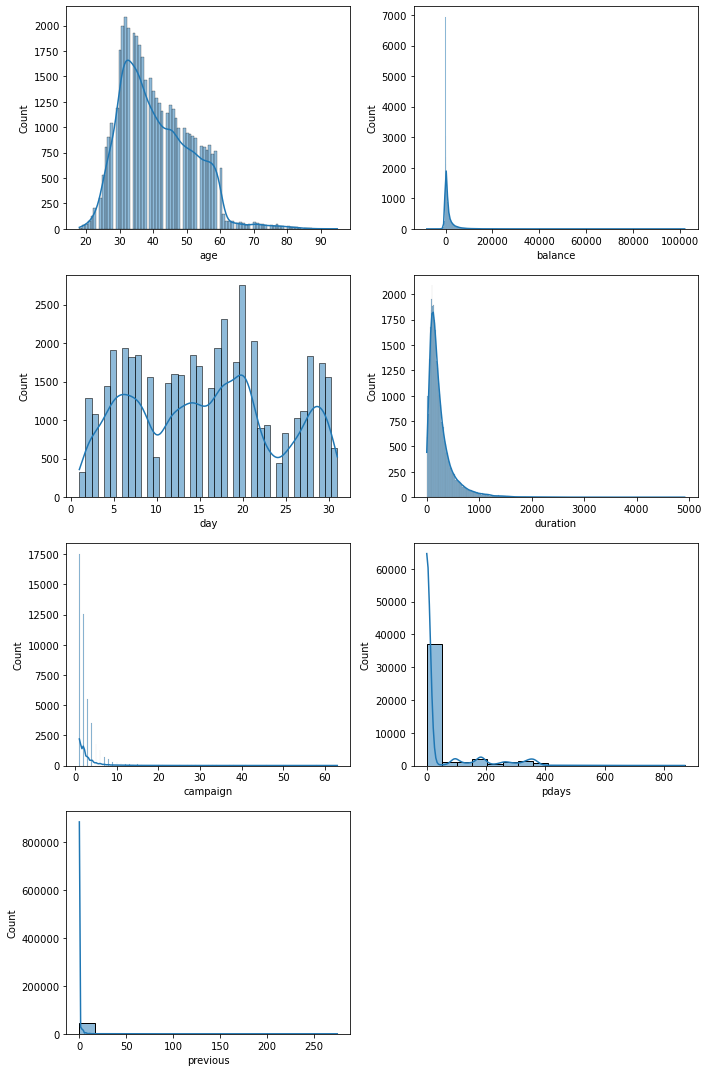

In [20]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
axe = axe.flatten()                      # to flatten subplot index positions

# NOTE: sns.distplot is depricated so using sns.histplot

sns.histplot(data['age'],     ax=axe[0], kde=True)  # Distance plot of 'age'
sns.histplot(data['balance'], ax=axe[1], kde=True)  # Distance plot of 'balance'
sns.histplot(data['day'],     ax=axe[2], kde=True)  # Distance plot of 'day'
sns.histplot(data['duration'],ax=axe[3], kde=True)  # Distance plot of 'duration'
sns.histplot(data['campaign'],ax=axe[4], kde=True)  # Distance plot of 'campaign'
sns.histplot(data['pdays'],   ax=axe[5], kde=True)  # Distance plot of 'pdays'
sns.histplot(data['previous'],ax=axe[6], kde=True)  # Distance plot of 'previous'

fig.tight_layout()   # for arranging the plots
fig.show()           # display plots

axe.flat[-1].set_visible(False)  # fig with negative graph plot will be hidden

### Understanding from the above distributions
* 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
* 'age' is somewhat normally distributed
* 'previous' didn't had any plotting on the graph, so the flat is negative, so its hidden.

## Distribution of Categorical columns.

C:\Users\Joy\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


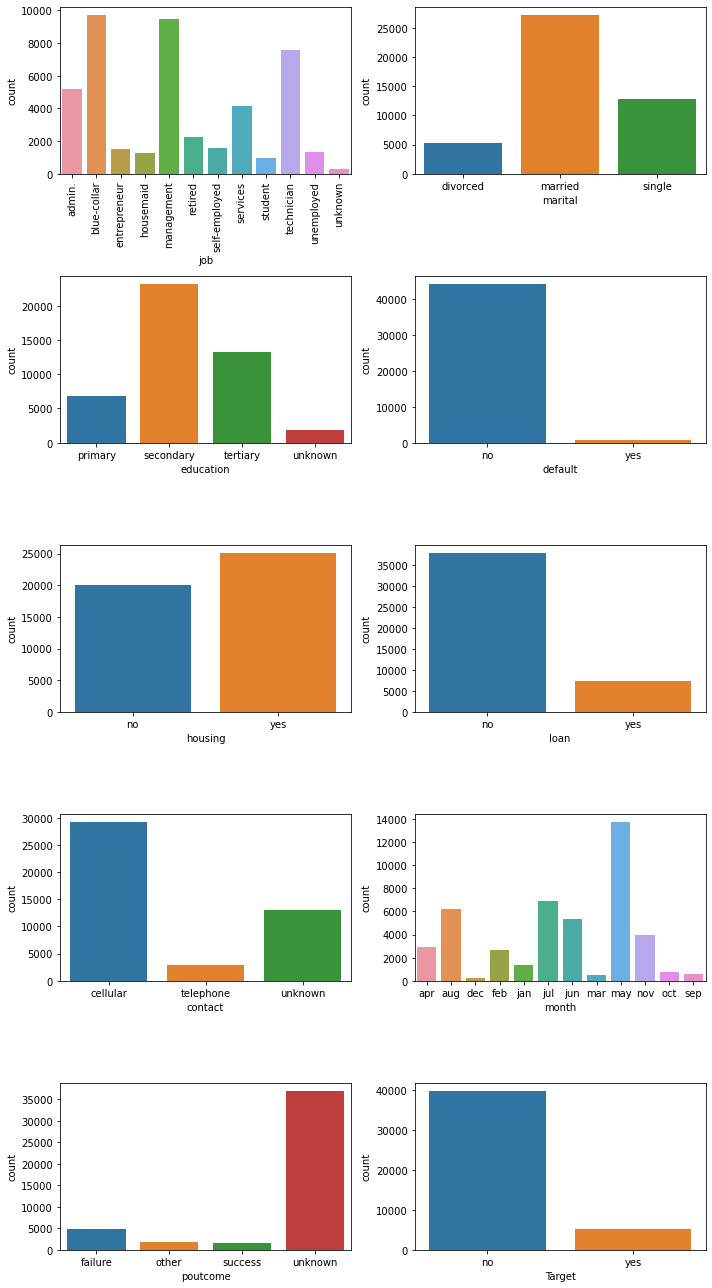

In [21]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten()                                      # to flatten subplot index positions

plot=sns.countplot(x=data['job'], data=data, ax=axe[0]) # Countplot of 'job'
plt.setp(plot.get_xticklabels(), rotation=90)       # for x-axis labels to be printed in 90 degree for 'job' categories count

sns.countplot(x=data['marital'],  data=data, ax=axe[1]) # Countplot of 'marital' 
sns.countplot(x=data['education'],data=data, ax=axe[2]) # Countplot of 'education' 
sns.countplot(x=data['default'],  data=data, ax=axe[3]) # Countplot of 'default' 
sns.countplot(x=data['housing'],  data=data, ax=axe[4]) # Countplot of 'housing' 
sns.countplot(x=data['loan'],     data=data, ax=axe[5]) # Countplot of 'loan' 
sns.countplot(x=data['contact'],  data=data, ax=axe[6]) # Countplot of 'contact' 
sns.countplot(x=data['month'],    data=data, ax=axe[7]) # Countplot of 'month' 
sns.countplot(x=data['poutcome'], data=data, ax=axe[8]) # Countplot of 'poutcome' 
sns.countplot(x=data['Target'],   data=data, ax=axe[9]) # Countplot of 'target'

fig.tight_layout() # for arranging the plots
fig.show()         # display plots

### Understandings from distributions
* More than 90% customers have no default credit
* Around 88% customers have not subscribed for term deposit
* Most customers have been contacted in may
* Most customers have been contacted by cellular network (mobile phone)
* Number of customers who have housing loan is more than the number of customers who don't have housing loan
* Around 6% customers have credit in default
* Most of the data attributes are unbalanced, except housing which is slightly balanced, so conclusion is that there won't be an accurate model creation with so many unbalanced data attributes

## Measure of skewness of numerical columns

In [22]:
data.skew().to_frame('Skewness measure  ').T

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


## Checking the presence of outliers

C:\Users\Joy\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


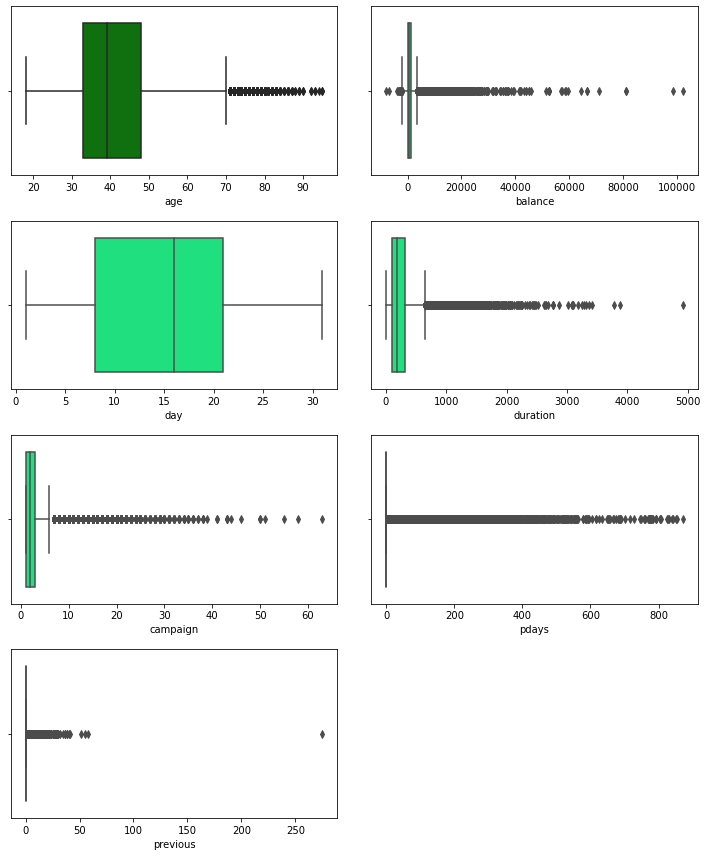

In [23]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()                  # to flatten subplot index positions

sns.boxplot(x='age',     data=data, color='green',      ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance', data=data, color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',     data=data, color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=data, color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=data, color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',   data=data, color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=data, color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 

fig.tight_layout()  # for arranging the plots
fig.show()          # display plots
axe.flat[-1].set_visible(False)

### Understanding from boxplots
* This Proves the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
* Values less than 0 are present in 'Balance' columns

## Distribution of Target column

In [24]:
data['Target'].value_counts().to_frame('Target column distriution')

,Target column distriution
no,39922
yes,5289


* Target dataset is highly imbalanced

# Data Preprocessing:

## Label Encoding of variables

In [25]:
data2 = data.copy()      # making a copy of dataframe 'data2'
encoder = LabelEncoder() # creating object of LabelEncoder 

data2['default']   = encoder.fit_transform(data2['default']).astype(int)   #encoding 'default' column 
data2['marital']   = encoder.fit_transform(data2['marital']).astype(int)   #encoding 'marital' column and assigning 1 married, 2 divorced and 3 single 
data2['loan']      = encoder.fit_transform(data2['loan']).astype(int)      #encoding 'loan' column and assigning 0 no and 1 yes values
data2['housing']   = encoder.fit_transform(data2['housing']).astype(int)   #encoding 'housing' column and assigning 0 no and 1 yes values
data2['Target']    = encoder.fit_transform(data2['Target']).astype(int)    #encoding 'target' column and assigning 0 no and 1 yes values
data2['month']     = encoder.fit_transform(data2['month']).astype(int)     #encoding 'month' column and assigning 0-11 values
data2['poutcome']  = encoder.fit_transform(data2['poutcome']).astype(int)  #encoding 'month' column and assigning 0-11 values
data2['education'] = encoder.fit_transform(data2['education']).astype(int) #encoding 'month' column and assigning 0-11 values

data2.head()  # displaying head of encoded dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


## Checking & modifying datatypes after Label Encoding

In [26]:
data2.dtypes.to_frame('').T # checking datatypes of attributes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
,int64,category,int32,int32,int32,int64,int32,int32,category,int64,int32,int64,int64,int64,int64,int32,int32


### Changing datatypes of attributes

In [27]:
data2[['job','marital','education','default',
      'housing','loan','contact',
      'month','poutcome','Target']] = data2[['job','marital','education','default',
                                            'housing','loan','contact',
                                            'month','poutcome','Target']].apply(pd.Categorical)

data2.dtypes.to_frame('').T # checking datatypes of attributes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


## Making copies of dataset

In [28]:
data3_withOutliers     = data2.copy() # for second scenario where duration is included with outliers not handled 
data5_medianOutlier    = data2.copy() # for fourth scenario ssimilar to first scenario but instead of mean, here median is used for hanling the outliers

# Handeling Outliers with mean replacement

In [29]:
meanbal = float(data2['balance'].mean()) # mean balance
# replacing with balance value with the mean-balance value if that balance value is greater than 3rd quatile (75%) range.  
data2['balance'] = np.where(data2['balance'] > np.percentile(data2['balance'], 75), meanbal,data2['balance'])

meandur = float(data2['duration'].mean()) # mean duration
# replacing with mean-duration value
data2['duration'] = np.where(data2['duration'] > np.percentile(data2['duration'], 75), meandur,data2['duration'])

meancam = float(data2['campaign'].mean()) # mean campaign
# replacing with mean-campaign value
data2['campaign'] = np.where(data2['campaign'] > np.percentile(data2['campaign'], 75), meancam,data2['campaign'])

meanpd = float(data2['pdays'].mean()) # mean pdays
# replacing with mean-pdays value
data2['pdays'] = np.where(data2['pdays'] > np.percentile(data2['pdays'], 75), meanpd,data2['pdays'])

meanpr = float(data2['previous'].mean()) # mean previous
# replacing with mean-previous value
data2['previous'] = np.where(data2['previous'] > np.percentile(data2['previous'], 75), meanpr,data2['previous']) 

## Making a copy of the dataset for third scenario where duration column is included and outliers handled by replacing with mean

In [30]:
data3 = data2.copy() # for third scenario where duration is included and outlier handled using mean
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0
1,44,technician,2,1,0,29.000000,1,0,unknown,5,8,151.0,1.0,-1.0,0.0,3,0
2,33,entrepreneur,1,1,0,2.000000,1,1,unknown,5,8,76.0,1.0,-1.0,0.0,3,0
3,47,blue-collar,1,3,0,1362.272058,1,0,unknown,5,8,92.0,1.0,-1.0,0.0,3,0
4,33,unknown,2,3,0,1.000000,0,0,unknown,5,8,198.0,1.0,-1.0,0.0,3,0


### Box-plotting to check for outliers after adjusting with the mean values

Boxplots after handeling outliers


C:\Users\Joy\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


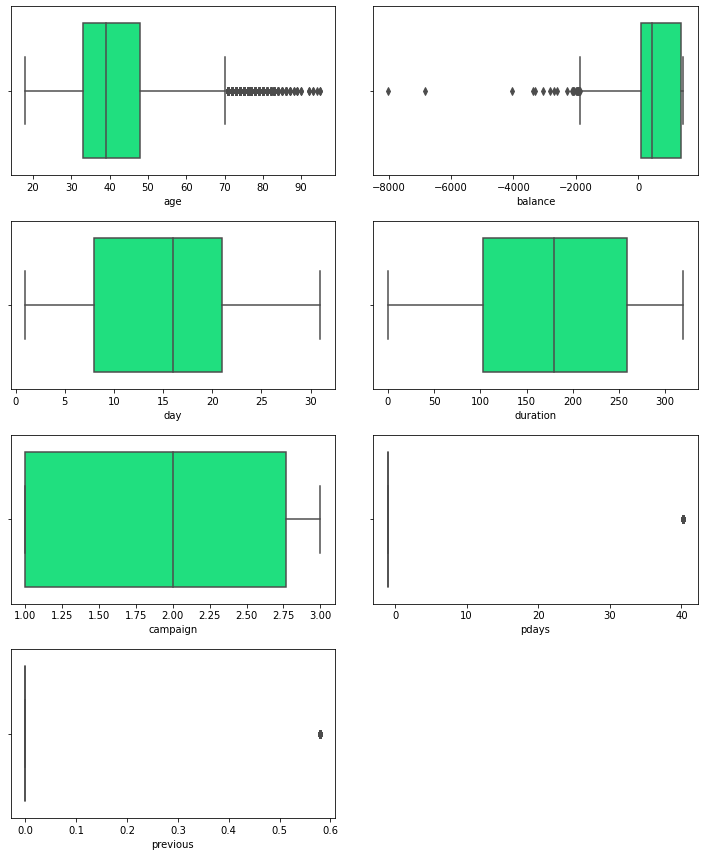

In [31]:
print('\033[1m''Boxplots after handeling outliers')

fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()        # to flatten subplot index positions

sns.boxplot(x='age',     data=data2, color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance', data=data2, color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',     data=data2, color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=data2, color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=data2, color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',   data=data2, color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=data2, color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 

fig.tight_layout() # for arranging the plots
fig.show()         # display plots

axe.flat[-1].set_visible(False)

### Understanding from boxplots after handeling outliers
* Outliers in 'age' column are not handled because it is a specific value for each record.
* After handeling Outliers in 'balance', the number of outliers on the lower side is increased.


## Correlation plot of all features

<AxesSubplot:>

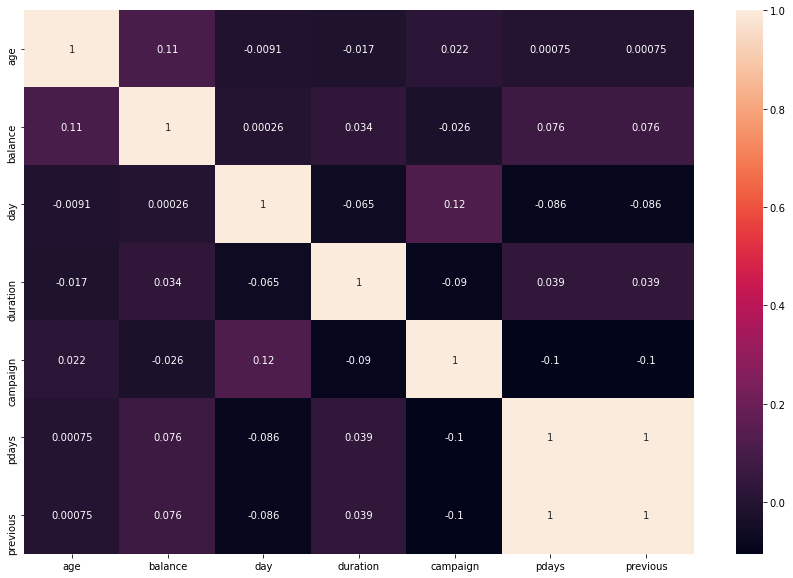

In [32]:
plt.figure(figsize=(15,10))          # for adjusting figuresize
sns.heatmap(data2.corr(),annot=True) # for correlation plot

### Understanding from above corrp plot:

* 'pdays' and 'previous' are highly correlated

## Removing columns:

* 'job','education' and 'contact' attributes contain multiple unknown values.
* As they are specific string values and not numerical so cannot be treated with median, mean replacement
* As per data description, duration attribute is removed to have a realistic prediction.
* 'day' and 'month' of contact will not have any realtionship with customer opting for subscription
* 'pdays' and 'previous' are highly correlated so removing any one from both of them.
*  Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models.

In [33]:
data2 = data2.drop(['job','education','contact','duration','pdays','day','month'],axis=1) #Dropping 'job','education','contact','poutcome','duration','day','month' columns
data2.head() # Head of updated dataframe

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features

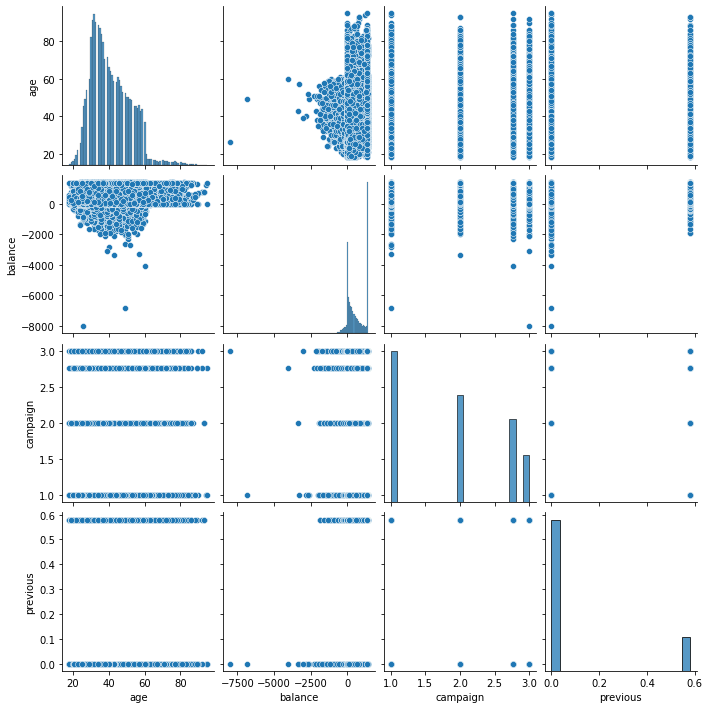

In [34]:
sns.pairplot(data2[['age','balance','campaign','previous']])

# Train Test Split (70:30)

In [35]:
X = data2.drop('Target',axis=1) # all the other independent variables, except Target, which is dependent. 
y = data2['Target']             # selecting target column, for dependent variable.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) # train test split in 70:30 ratio

# Scaling of columns

In [36]:
scaler = StandardScaler()                      # using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) # Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test)   # Scaling of Test dataset

# Models:
## Logistic Regression:

In [37]:
logic_r = LogisticRegression(solver='liblinear') # Instantiate the LogisticRegression object

# Call the fit method of logistic regression to train the model or to learn the parameters of model
logic_r.fit(X_train_scaled,y_train) 

y_pred = logic_r.predict(X_test_scaled) # Predict

In [38]:
print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred),"\n") # for confusion matrix

print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy))     # for accuracy score
print('-'*40)

print('\n Classification Report\n',classification_report(y_test,y_pred)) # for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11897   116]
 [ 1310   241]] 

----------------------------------------
Accuracy of Logistic Regression :0.89
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


## Naive Bayes

In [39]:
NB = GaussianNB()                   # Instantiate the Gaussian Naive bayes 
NB.fit(X_train_scaled,y_train)      # Call the fit method of NB to train the model or to learn the parameters of model
y_predi = NB.predict(X_test_scaled) # Predict 

In [40]:
print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) # for confusion matrix

print('-'*30)
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy))         # for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,y_predi)) # for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of Naive Bayes :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


## K-Nearest Neighbor

In [41]:
# k=3
knn = KNeighborsClassifier(n_neighbors = 3) # Instantiate KNN with k=3
knn.fit(X_train_scaled,y_train)             # Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test_scaled)      # Predict 

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) # for confusion matrix

print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy))                 # for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,y_predi)) # for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of KNN :0.87
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


optimal k is 13


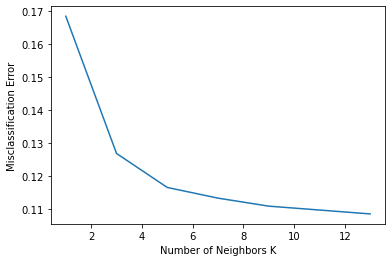

In [42]:
oddList   = list(np.arange(1,15))                       # Range from 1 to 15
neighbors = list(filter(lambda x: x % 2 != 0, oddList)) # Selecting only odd numbers from Range 1 to 14

accuracy_list = [] # Empty list to store accuracy scores of KNN models based on various K values

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i) # Instantiate KNN with k=i
    knn.fit(X_train_scaled,y_train)     # Call the fit method of KNN to train the model or to learn the parameters of model
    y_pred = knn.predict(X_test_scaled)         # Predict 
    accuracy_s = accuracy_score(y_test,y_pred)  # for accuracy score
    accuracy_list.append(accuracy_s)            # for appedning accuracy score to accuracy score list
    
    
MSE=[1 - j for j in accuracy_list] # calculation of Mean Squared Error


optimal = neighbors[MSE.index(min(MSE))] # Optimal K value selected by minimum MSE
print('optimal k is',optimal)            # Print optimal K value selected by minimum MSE

plt.plot(neighbors,MSE)               # MSE plot 
plt.xlabel('Number of Neighbors K')   # XLabel
plt.ylabel('Misclassification Error') # YLabel
plt.show()                            # display plot

## SVC

In [43]:
svc = SVC()                                # Instantiate SVC
svc.fit(X_train_scaled,y_train)            # Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test_scaled) # Predict 

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc)) #for confusion matrix

print('-'*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_svc)) #for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11867   146]
 [ 1273   278]]
------------------------------
Accuracy of SVC : 0.8953848422294308
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


# Ensemble Models

## Decision Tree

In [44]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)  # Instantiate Decision Tree
dTree.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DT = dTree.predict(X_test)        # Predict 

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT)) #for confusion matrix

print('-'*30)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy)) #for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_DT)) #for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11020   993]
 [ 1190   361]]
------------------------------
Accuracy of Decision Tree :0.84
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.27      0.23      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.84      0.83     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


## Feature importance test for decision tree

In [45]:
xvar = data2.drop('Target', axis=1)  # variables in x
feature_cols = xvar.columns          # columns in x
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) # compute feature importance

feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) # dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')    # conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False)                         # sort in descending order

,0
balance,0.442826
age,0.248702
poutcome,0.095115
campaign,0.086817
marital,0.040698
previous,0.034347
loan,0.025493
housing,0.022714
default,0.003286


## Pruning of Decision Tree

In [46]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)   # Instantiate Decision Tree with max_depth
dTreeR.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test)       # Predict

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR))       # for confusion matrix

print('-'*30)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy)) # for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_DTR))    # for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11826   187]
 [ 1237   314]]
------------------------------
Accuracy of Decision Tree with Regularization:0.90
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


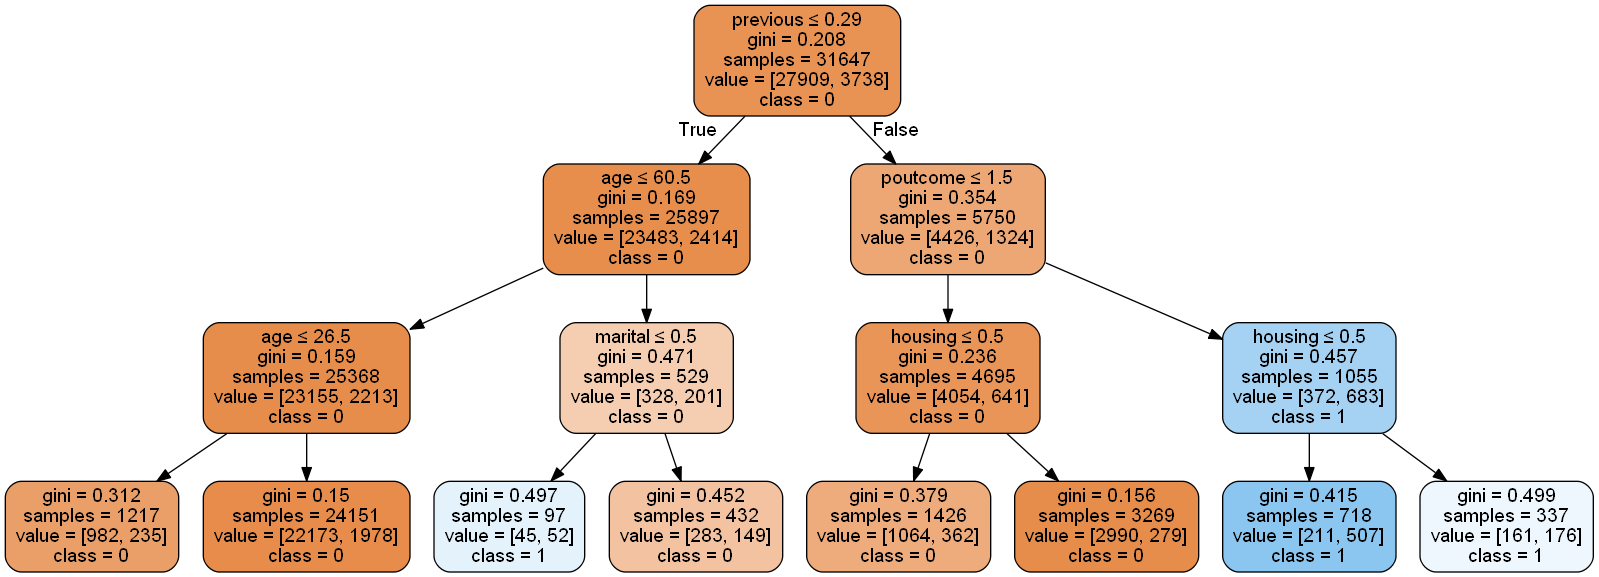

In [47]:
dot_data = StringIO()                        # string IO object

export_graphviz(dTreeR, out_file=dot_data,  
                 filled=True, rounded=True,
                 special_characters=True, feature_names=feature_cols, class_names=['0','1']) # export graph data to dot format

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) # create graph from dot data
graph.write_png('DT.png')                                  # create png
Image(graph.create_png())                                  # display image

In [48]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False) # compute feature importance

feat_imp_dict   = dict(zip(feature_cols, dTreeR.feature_importances_))  # dictionary of columns and importance
feat_imp        = pd.DataFrame.from_dict(feat_imp_dict, orient='index') # conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False)                             # sort in descending order

,0
poutcome,0.547320
previous,0.215141
age,0.142976
housing,0.087515
marital,0.007048
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


## Bagging

In [49]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) # Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train)    # Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) # Predict

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG)) # for confusion matrix

print('-'*30)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy))             # for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_BAG)) # for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11613   400]
 [ 1222   329]]
------------------------------
Accuracy of Decision Tree :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


## Adaptive Boosting

In [50]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train)    # Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) # Predict

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) # for confusion matrix

print('-'*30)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy))                       # for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_ADA)) # for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11884   129]
 [ 1309   242]]
------------------------------
Accuracy of KNN :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


## Gradient boosting

In [51]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) # Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)    # Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) # Predict

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD)) # for confusion matrix

print('-'*30)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy))                       # for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_GRAD)) # for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11889   124]
 [ 1305   246]]
------------------------------
Accuracy of KNN :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


## Random Forest

In [52]:
#n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)   # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) # Predict

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN )) #for confusion matrix

print('-'*30)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('Accuracy of KNN :{:.2f}'.format(RAN_accuracy)) #for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_RAN )) #for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11588   425]
 [ 1211   340]]
------------------------------
Accuracy of KNN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.44      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


In [53]:
#n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)    # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RANN = randf.predict(X_test) # Predict

print('\033[1m''<>'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RANN)) # for confusion matrix

print('-'*30)
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
print('Accuracy of KNN :{:.2f}'.format(RANN_accuracy))                       # for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_RANN)) # for classification report
print('<>'*63)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Confusion Matrix
 [[11614   399]
 [ 1216   335]]
------------------------------
Accuracy of KNN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.93     12013
           1       0.46      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


# Models with accuracy scores

In [54]:
# List of accuracy scores of all models

Scores = [('Naive bayes',         NB_accuracy),
          ('KNN',                KNN_accuracy),
          ('Logistic Regression', LR_accuracy),
          ('SVC',                SVC_accuracy),
          ('Decision Tree',       DT_accuracy),
          ('Decision Tree with Regularization',DTR_accuracy),
          ('Bagging',            BAG_accuracy),
          ('Adaptive Boosting',  ADA_accuracy),
          ('Gradient Boosting', GRAD_accuracy),
          ('Random Forest N=100',RAN_accuracy),
          ('Random Forest N=500',RANN_accuracy)] 

Scores = pd.DataFrame(Scores, columns=['Model','Accuracy score']) # Conversion of list to dataframe

print('\033[1m''Current Scores with Outliers replaced with mean : ')
Scores.sort_values(by='Accuracy score',ascending=False)  # Sort values in descending Accuracy score

Current Scores with Outliers replaced with mean : 


,Model,Accuracy score
3,SVC,0.895385
5,Decision Tree with Regularization,0.895016
2,Logistic Regression,0.894869
8,Gradient Boosting,0.894648
7,Adaptive Boosting,0.893984
10,Random Forest N=500,0.880935
6,Bagging,0.880419
9,Random Forest N=100,0.879387
1,KNN,0.873120
4,Decision Tree,0.839059


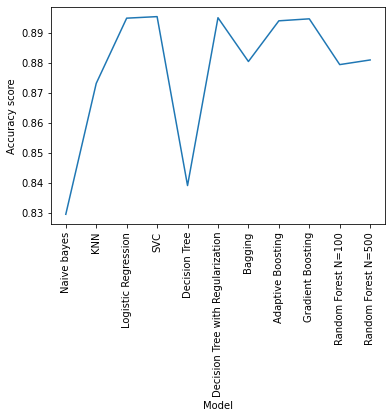

In [55]:
# Countplot of Scores
sns.lineplot(x=Scores['Model'], y=Scores['Accuracy score'], data=Scores, markers=True, dashes=False) 

plt.xticks(rotation=90)
plt.show()

# =============================================================

# Benchmark with Duration column and Outliers not handled

In [56]:
# Dropping 'job','education','contact','poutcome','day','month' columns except 'duration' column
data3_withOutliers = data3_withOutliers.drop(['job','education','contact','pdays','day','month'],axis=1)

In [57]:
data3_withOutliers.head() # Head of updated dataframe

,age,marital,default,balance,housing,loan,duration,campaign,previous,poutcome,Target
0,58,1,0,2143,1,0,261,1,0,3,0
1,44,2,0,29,1,0,151,1,0,3,0
2,33,1,0,2,1,1,76,1,0,3,0
3,47,1,0,1506,1,0,92,1,0,3,0
4,33,2,0,1,0,0,198,1,0,3,0


In [58]:
# Train Test Split
X = data3_withOutliers.drop('Target',axis=1) # all the other independent variables, except Target, which is dependent. 
y = data3_withOutliers['Target']             # selecting target column, for dependent variable.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) # train test split in 70:30 ratio

In [59]:
# Scalling
scaler = StandardScaler()                      # using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) # Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test)   # Scaling of Test dataset

In [60]:
# Logistic Regression
logic_r = LogisticRegression(solver='liblinear') # Instantiate the LogisticRegression object
# Call the fit method of logistic regression to train the model or to learn the parameters of model
logic_r.fit(X_train_scaled,y_train) 
y_pred = logic_r.predict(X_test_scaled) # Predict
LR_accuracy = accuracy_score(y_test,y_pred)
LR_accuracy

0.8886759068121498

In [61]:
# Naive Bayes
NB = GaussianNB()                   # Instantiate the Gaussian Naive bayes
NB.fit(X_train_scaled,y_train)      # Call the fit method of NB to train the model or to learn the parameters of model
y_predi = NB.predict(X_test_scaled) # Predict 
NB_accuracy = accuracy_score(y_test,y_predi)
NB_accuracy

0.8709082866411089

In [62]:
# K-Nearest Neighbor
# k=3
knn = KNeighborsClassifier(n_neighbors = 3) # Instantiate KNN with k=3
knn.fit(X_train_scaled,y_train)             # Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test_scaled)      # Predict 
KNN_accuracy = accuracy_score(y_test,y_predict)
KNN_accuracy

0.8880123857269242

In [63]:
# SVC
svc = SVC()                                # Instantiate SVC
svc.fit(X_train_scaled,y_train)            # Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test_scaled) # Predict 
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
SVC_accuracy

0.8981126511353583

In [64]:
# Decision Tree
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)  # Instantiate Decision Tree
dTree.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DT = dTree.predict(X_test)        # Predict 
DT_accuracy = accuracy_score(y_test,predicted_DT)
DT_accuracy

0.8563845473311708

In [65]:
xvar = data3_withOutliers.drop('Target', axis=1)  # variables in x
feature_cols = xvar.columns          # columns in x
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) # compute feature importance

feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) # dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')    # conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) 

,0
duration,0.374379
balance,0.224973
age,0.159009
poutcome,0.072971
campaign,0.053552
previous,0.043163
marital,0.029535
housing,0.024514
loan,0.015668
default,0.002237


In [66]:
# Decision Tree with Regularization
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)   # Instantiate Decision Tree with max_depth
dTreeR.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test)       # Predict
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
DTR_accuracy

0.8939103509289296

In [67]:
# Bagging
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) # Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train)    # Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) # Predict
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
BAG_accuracy

0.8947950457092303

In [68]:
# Adaptive Boosting
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train)    # Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) # Predict
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
ADA_accuracy

0.8961958124447066

In [69]:
# Gradient Boosting
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) # Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)    # Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) # Predict
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
GRAD_accuracy

0.8992922441757594

In [70]:
# Random Forest
# n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)   # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) # Predict
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
RAN_accuracy

0.8972279563550575

In [71]:
# Random Forest
# n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)    # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RANN = randf.predict(X_test) # Predict
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
RANN_accuracy

0.8956060159245061

In [72]:
# List of accuracy scores of all models

Scores = [('Naive bayes',         NB_accuracy),
          ('KNN',                KNN_accuracy),
          ('Logistic Regression', LR_accuracy),
          ('SVC',                SVC_accuracy),
          ('Decision Tree',       DT_accuracy),
          ('Decision Tree with Regularization',DTR_accuracy),
          ('Bagging',            BAG_accuracy),
          ('Adaptive Boosting',  ADA_accuracy),
          ('Gradient Boosting', GRAD_accuracy),
          ('Random Forest N=100',RAN_accuracy),
          ('Random Forest N=500',RANN_accuracy)] 

Scores = pd.DataFrame(Scores, columns=['Model','Accuracy score']) # Conversion of list to dataframe

print('\033[1m''Current Scores with Duration column and Outliers not handled : ')
Scores.sort_values(by='Accuracy score',ascending=False)  # Sort values in descending Accuracy score

Current Scores with Duration column and Outliers not handled : 


,Model,Accuracy score
8,Gradient Boosting,0.899292
3,SVC,0.898113
9,Random Forest N=100,0.897228
7,Adaptive Boosting,0.896196
10,Random Forest N=500,0.895606
6,Bagging,0.894795
5,Decision Tree with Regularization,0.893910
2,Logistic Regression,0.888676
1,KNN,0.888012
0,Naive bayes,0.870908


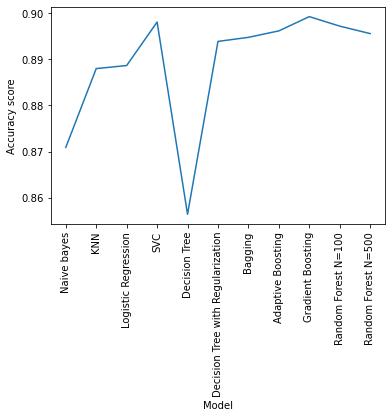

In [73]:
# Countplot of Scores
sns.lineplot(x=Scores['Model'], y=Scores['Accuracy score'], data=Scores, markers=True, dashes=False) 

plt.xticks(rotation=90)
plt.show()

# =============================================================

# Benchmark with Duration column and Outliers handled with Mean replacement

In [74]:
# Dropping 'job','education','contact','poutcome','day','month' columns except 'duration' column
data3 = data3.drop(['job','education','contact','pdays','day','month'],axis=1)
data3.head()

,age,marital,default,balance,housing,loan,duration,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,261.0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,151.0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,76.0,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,92.0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,198.0,1.0,0.0,3,0


In [75]:
# Train Test Split
X = data3.drop('Target',axis=1) # all the other independent variables, except Target, which is dependent. 
y = data3['Target']             # selecting target column, for dependent variable.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) # train test split in 70:30 ratio

In [76]:
# Scalling
scaler = StandardScaler()                      # using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) # Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test)   # Scaling of Test dataset

In [77]:
# Logistic Regression
logic_r = LogisticRegression(solver='liblinear') # Instantiate the LogisticRegression object
# Call the fit method of logistic regression to train the model or to learn the parameters of model
logic_r.fit(X_train_scaled,y_train) 
y_pred = logic_r.predict(X_test_scaled) # Predict
LR_accuracy = accuracy_score(y_test,y_pred)
LR_accuracy

0.895532291359481

In [78]:
# Naive Bayes
NB = GaussianNB()                   # Instantiate the Gaussian Naive bayes
NB.fit(X_train_scaled,y_train)      # Call the fit method of NB to train the model or to learn the parameters of model
y_predi = NB.predict(X_test_scaled) # Predict 
NB_accuracy = accuracy_score(y_test,y_predi)
NB_accuracy

0.8568268947213211

In [79]:
# K-Nearest Neighbor
# k=3
knn = KNeighborsClassifier(n_neighbors = 3) # Instantiate KNN with k=3
knn.fit(X_train_scaled,y_train)             # Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test_scaled)      # Predict 
KNN_accuracy = accuracy_score(y_test,y_predict)
KNN_accuracy

0.8709820112061338

In [80]:
# SVC
svc = SVC()                                # Instantiate SVC
svc.fit(X_train_scaled,y_train)            # Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test_scaled) # Predict 
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
SVC_accuracy

0.8984812739604836

In [81]:
# Decision Tree
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)  # Instantiate Decision Tree
dTree.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DT = dTree.predict(X_test)        # Predict 
DT_accuracy = accuracy_score(y_test,predicted_DT)
DT_accuracy

0.8402388675906812

In [82]:
xvar = data3.drop('Target', axis=1)  # variables in x
feature_cols = xvar.columns          # columns in x
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) # compute feature importance

feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) # dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')    # conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False)

,0
balance,0.278984
duration,0.244598
age,0.234503
campaign,0.070601
poutcome,0.068011
marital,0.031588
previous,0.031028
loan,0.019305
housing,0.018243
default,0.003141


In [83]:
# Decision Tree with Regularization
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)   # Instantiate Decision Tree with max_depth
dTreeR.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test)       # Predict
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
DTR_accuracy

0.8954585667944559

In [84]:
# Bagging
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) # Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train)    # Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) # Predict
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
BAG_accuracy

0.8806399292244176

In [85]:
# Adaptive Boosting
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train)    # Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) # Predict
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
ADA_accuracy

0.8940578000589796

In [86]:
# Gradient Boosting
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) # Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)    # Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) # Predict
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
GRAD_accuracy

0.8961220878796815

In [87]:
# Random Forest
# n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)   # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) # Predict
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
RAN_accuracy

0.8809348274845178

In [88]:
# Random Forest
# n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)    # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RANN = randf.predict(X_test) # Predict
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
RANN_accuracy

0.8827042170451195

In [89]:
# List of accuracy scores of all models

Scores = [('Naive bayes',         NB_accuracy),
          ('KNN',                KNN_accuracy),
          ('Logistic Regression', LR_accuracy),
          ('SVC',                SVC_accuracy),
          ('Decision Tree',       DT_accuracy),
          ('Decision Tree with Regularization',DTR_accuracy),
          ('Bagging',            BAG_accuracy),
          ('Adaptive Boosting',  ADA_accuracy),
          ('Gradient Boosting', GRAD_accuracy),
          ('Random Forest N=100',RAN_accuracy),
          ('Random Forest N=500',RANN_accuracy)] 

Scores = pd.DataFrame(Scores, columns=['Model','Accuracy score']) # Conversion of list to dataframe

print('\033[1m''Benchmark with Duration column and Outliers handled with Mean replacement: ')
Scores.sort_values(by='Accuracy score',ascending=False)  # Sort values in descending Accuracy score

Benchmark with Duration column and Outliers handled with Mean replacement: 


,Model,Accuracy score
3,SVC,0.898481
8,Gradient Boosting,0.896122
2,Logistic Regression,0.895532
5,Decision Tree with Regularization,0.895459
7,Adaptive Boosting,0.894058
10,Random Forest N=500,0.882704
9,Random Forest N=100,0.880935
6,Bagging,0.880640
1,KNN,0.870982
0,Naive bayes,0.856827


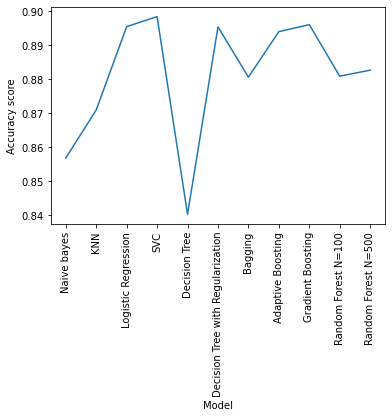

In [90]:
# Countplot of Scores
sns.lineplot(x=Scores['Model'], y=Scores['Accuracy score'], data=Scores, markers=True, dashes=False) 

plt.xticks(rotation=90)
plt.show()

# =============================================================

# Benchmark Scores with Outliers replaced with median

In [91]:
data5_medianOutlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


### Outlier handling with median replacement

In [92]:
medbal = float(data5_medianOutlier['balance'].median()) # median balance
# replacing with balance value with the median-balance value if that balance value is greater than 3rd quatile (75%) range.  
data5_medianOutlier['balance'] = np.where(data5_medianOutlier['balance'] > np.percentile(data5_medianOutlier['balance'], 75), medbal,data5_medianOutlier['balance'])

meddur = float(data5_medianOutlier['duration'].median()) # median duration
# replacing with median-duration value
data5_medianOutlier['duration'] = np.where(data5_medianOutlier['duration'] > np.percentile(data5_medianOutlier['duration'], 75), meddur,data5_medianOutlier['duration'])

medcam = float(data5_medianOutlier['campaign'].median()) # median campaign
# replacing with median-campaign value
data5_medianOutlier['campaign'] = np.where(data5_medianOutlier['campaign'] > np.percentile(data5_medianOutlier['campaign'], 75), medcam,data5_medianOutlier['campaign'])

medpd = float(data5_medianOutlier['pdays'].median()) # median pdays
# replacing with median-pdays value
data5_medianOutlier['pdays'] = np.where(data5_medianOutlier['pdays'] > np.percentile(data5_medianOutlier['pdays'], 75), medpd,data5_medianOutlier['pdays'])

medpr = float(data5_medianOutlier['previous'].median()) # median previous
# replacing with median-previous value
data5_medianOutlier['previous'] = np.where(data5_medianOutlier['previous'] > np.percentile(data5_medianOutlier['previous'], 75), medpr,data5_medianOutlier['previous']) 

data5_medianOutlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,448.0,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0
1,44,technician,2,1,0,29.0,1,0,unknown,5,8,151.0,1.0,-1.0,0.0,3,0
2,33,entrepreneur,1,1,0,2.0,1,1,unknown,5,8,76.0,1.0,-1.0,0.0,3,0
3,47,blue-collar,1,3,0,448.0,1,0,unknown,5,8,92.0,1.0,-1.0,0.0,3,0
4,33,unknown,2,3,0,1.0,0,0,unknown,5,8,198.0,1.0,-1.0,0.0,3,0


In [93]:
# Dropping 'job','education','contact','poutcome','day','month','duration' columns
data5_medianOutlier = data5_medianOutlier.drop(['job','education','duration','contact','pdays','day','month'],axis=1)
data5_medianOutlier.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,448.0,1,0,1.0,0.0,3,0
1,44,2,0,29.0,1,0,1.0,0.0,3,0
2,33,1,0,2.0,1,1,1.0,0.0,3,0
3,47,1,0,448.0,1,0,1.0,0.0,3,0
4,33,2,0,1.0,0,0,1.0,0.0,3,0


In [94]:
# Train Test Split
X = data5_medianOutlier.drop('Target',axis=1) # all the other independent variables, except Target, which is dependent. 
y = data5_medianOutlier['Target']             # selecting target column, for dependent variable.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) # train test split in 70:30 ratio

In [95]:
# Scalling
scaler = StandardScaler()                      # using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) # Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test)   # Scaling of Test dataset

In [96]:
# Logistic Regression
logic_r = LogisticRegression(solver='liblinear') # Instantiate the LogisticRegression object
# Call the fit method of logistic regression to train the model or to learn the parameters of model
logic_r.fit(X_train_scaled,y_train) 
y_pred = logic_r.predict(X_test_scaled) # Predict
LR_accuracy = accuracy_score(y_test,y_pred)
LR_accuracy

0.8856531996461221

In [97]:
# Naive Bayes
NB = GaussianNB()                   # Instantiate the Gaussian Naive bayes
NB.fit(X_train_scaled,y_train)      # Call the fit method of NB to train the model or to learn the parameters of model
y_predi = NB.predict(X_test_scaled) # Predict 
NB_accuracy = accuracy_score(y_test,y_predi)
NB_accuracy

0.8771748746682395

In [98]:
# K-Nearest Neighbor
# k=3
knn = KNeighborsClassifier(n_neighbors = 3) # Instantiate KNN with k=3
knn.fit(X_train_scaled,y_train)             # Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test_scaled)      # Predict 
KNN_accuracy = accuracy_score(y_test,y_predict)
KNN_accuracy

0.8738572692421115

In [99]:
# SVC
svc = SVC()                                # Instantiate SVC
svc.fit(X_train_scaled,y_train)            # Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test_scaled) # Predict 
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
SVC_accuracy

0.8914774402831024

In [100]:
# Decision Tree
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)  # Instantiate Decision Tree
dTree.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DT = dTree.predict(X_test)        # Predict 
DT_accuracy = accuracy_score(y_test,predicted_DT)
DT_accuracy

0.8402388675906812

In [101]:
xvar = data5_medianOutlier.drop('Target', axis=1)  # variables in x
feature_cols = xvar.columns          # columns in x
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) # compute feature importance

feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) # dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')    # conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False)

,0
balance,0.463652
age,0.250900
poutcome,0.129538
campaign,0.059694
marital,0.043659
loan,0.024479
housing,0.024210
default,0.003868
previous,0.000000


In [102]:
# Decision Tree with Regularization
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)   # Instantiate Decision Tree with max_depth
dTreeR.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test)       # Predict
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
DTR_accuracy

0.8950899439693306

In [103]:
# Bagging
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) # Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train)    # Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) # Predict
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
BAG_accuracy

0.8795340607490416

In [104]:
# Adaptive Boosting
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train)    # Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) # Predict
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
ADA_accuracy

0.8945738720141552

In [105]:
# Gradient Boosting
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) # Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)    # Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) # Predict
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
GRAD_accuracy

0.8950162194043055

In [106]:
# Random Forest
# n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)   # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) # Predict
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
RAN_accuracy

0.87776467118844

In [107]:
# Random Forest
# n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)    # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RANN = randf.predict(X_test) # Predict
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
RANN_accuracy

0.8802713063992923

In [108]:
# List of accuracy scores of all models

Scores = [('Naive bayes',         NB_accuracy),
          ('KNN',                KNN_accuracy),
          ('Logistic Regression', LR_accuracy),
          ('SVC',                SVC_accuracy),
          ('Decision Tree',       DT_accuracy),
          ('Decision Tree with Regularization',DTR_accuracy),
          ('Bagging',            BAG_accuracy),
          ('Adaptive Boosting',  ADA_accuracy),
          ('Gradient Boosting', GRAD_accuracy),
          ('Random Forest N=100',RAN_accuracy),
          ('Random Forest N=500',RANN_accuracy)] 

Scores = pd.DataFrame(Scores, columns=['Model','Accuracy score']) # Conversion of list to dataframe

print('\033[1m''Benchmark Scores with Outliers replaced with median: ')
Scores.sort_values(by='Accuracy score',ascending=False)  # Sort values in descending Accuracy score

Benchmark Scores with Outliers replaced with median: 


,Model,Accuracy score
5,Decision Tree with Regularization,0.895090
8,Gradient Boosting,0.895016
7,Adaptive Boosting,0.894574
3,SVC,0.891477
2,Logistic Regression,0.885653
10,Random Forest N=500,0.880271
6,Bagging,0.879534
9,Random Forest N=100,0.877765
0,Naive bayes,0.877175
1,KNN,0.873857


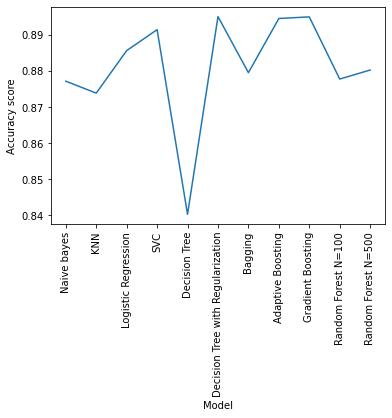

In [109]:
# Countplot of Scores
sns.lineplot(x=Scores['Model'], y=Scores['Accuracy score'], data=Scores, markers=True, dashes=False) 

plt.xticks(rotation=90)
plt.show()

# =============================================================

# Benchmark Scores without Outliers handeling

In [110]:
data3_withOutliers.head()

,age,marital,default,balance,housing,loan,duration,campaign,previous,poutcome,Target
0,58,1,0,2143,1,0,261,1,0,3,0
1,44,2,0,29,1,0,151,1,0,3,0
2,33,1,0,2,1,1,76,1,0,3,0
3,47,1,0,1506,1,0,92,1,0,3,0
4,33,2,0,1,0,0,198,1,0,3,0


In [111]:
# Dropping 'job','education','contact','poutcome','day','month','duration' column
# data3_withOutliers = data3_withOutliers.drop(['duration'],axis=1)
data3_withOutliers.head()

,age,marital,default,balance,housing,loan,duration,campaign,previous,poutcome,Target
0,58,1,0,2143,1,0,261,1,0,3,0
1,44,2,0,29,1,0,151,1,0,3,0
2,33,1,0,2,1,1,76,1,0,3,0
3,47,1,0,1506,1,0,92,1,0,3,0
4,33,2,0,1,0,0,198,1,0,3,0


In [112]:
# Train Test Split
X = data3_withOutliers.drop('Target',axis=1) # all the other independent variables, except Target, which is dependent. 
y = data3_withOutliers['Target']             # selecting target column, for dependent variable.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) # train test split in 70:30 ratio

In [113]:
# Scalling
scaler = StandardScaler()                      # using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) # Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test)   # Scaling of Test dataset

In [114]:
# Logistic Regression
logic_r = LogisticRegression(solver='liblinear') # Instantiate the LogisticRegression object
# Call the fit method of logistic regression to train the model or to learn the parameters of model
logic_r.fit(X_train_scaled,y_train) 
y_pred = logic_r.predict(X_test_scaled) # Predict
LR_accuracy = accuracy_score(y_test,y_pred)
LR_accuracy

0.8886759068121498

In [115]:
# Naive Bayes
NB = GaussianNB()                   # Instantiate the Gaussian Naive bayes
NB.fit(X_train_scaled,y_train)      # Call the fit method of NB to train the model or to learn the parameters of model
y_predi = NB.predict(X_test_scaled) # Predict 
NB_accuracy = accuracy_score(y_test,y_predi)
NB_accuracy

0.8709082866411089

In [116]:
# K-Nearest Neighbor
# k=3
knn = KNeighborsClassifier(n_neighbors = 3) # Instantiate KNN with k=3
knn.fit(X_train_scaled,y_train)             # Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test_scaled)      # Predict 
KNN_accuracy = accuracy_score(y_test,y_predict)
KNN_accuracy

0.8880123857269242

In [117]:
# SVC
svc = SVC()                                # Instantiate SVC
svc.fit(X_train_scaled,y_train)            # Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test_scaled) # Predict 
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
SVC_accuracy

0.8981126511353583

In [118]:
# Decision Tree
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)  # Instantiate Decision Tree
dTree.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DT = dTree.predict(X_test)        # Predict 
DT_accuracy = accuracy_score(y_test,predicted_DT)
DT_accuracy

0.8563845473311708

In [119]:
xvar = data3_withOutliers.drop('Target', axis=1)  # variables in x
feature_cols = xvar.columns          # columns in x
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) # compute feature importance

feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) # dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')    # conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.374379
balance,0.224973
age,0.159009
poutcome,0.072971
campaign,0.053552
previous,0.043163
marital,0.029535
housing,0.024514
loan,0.015668
default,0.002237


In [120]:
# Decision Tree with Regularization
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)   # Instantiate Decision Tree with max_depth
dTreeR.fit(X_train, y_train)                 # Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test)       # Predict
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
DTR_accuracy

0.8939103509289296

In [121]:
# Bagging
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) # Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train)    # Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) # Predict
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
BAG_accuracy

0.8947950457092303

In [122]:
# Adaptive Boosting
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train)    # Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) # Predict
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
ADA_accuracy

0.8961958124447066

In [123]:
# Gradient Boosting
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) # Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)    # Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) # Predict
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
GRAD_accuracy

0.8992922441757594

In [124]:
# Random Forest
# n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)   # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) # Predict
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
RAN_accuracy

0.8972279563550575

In [125]:
# Random Forest
# n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5) # Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)    # Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RANN = randf.predict(X_test) # Predict
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
RANN_accuracy

0.8956060159245061

In [126]:
# List of accuracy scores of all models

Scores = [('Naive bayes',         NB_accuracy),
          ('KNN',                KNN_accuracy),
          ('Logistic Regression', LR_accuracy),
          ('SVC',                SVC_accuracy),
          ('Decision Tree',       DT_accuracy),
          ('Decision Tree with Regularization',DTR_accuracy),
          ('Bagging',            BAG_accuracy),
          ('Adaptive Boosting',  ADA_accuracy),
          ('Gradient Boosting', GRAD_accuracy),
          ('Random Forest N=100',RAN_accuracy),
          ('Random Forest N=500',RANN_accuracy)] 

Scores = pd.DataFrame(Scores, columns=['Model','Accuracy score']) # Conversion of list to dataframe

print('\033[1m''Scores without Outliers handeling: ')
Scores.sort_values(by='Accuracy score',ascending=False)  # Sort values in descending Accuracy score

Scores without Outliers handeling: 


,Model,Accuracy score
8,Gradient Boosting,0.899292
3,SVC,0.898113
9,Random Forest N=100,0.897228
7,Adaptive Boosting,0.896196
10,Random Forest N=500,0.895606
6,Bagging,0.894795
5,Decision Tree with Regularization,0.893910
2,Logistic Regression,0.888676
1,KNN,0.888012
0,Naive bayes,0.870908


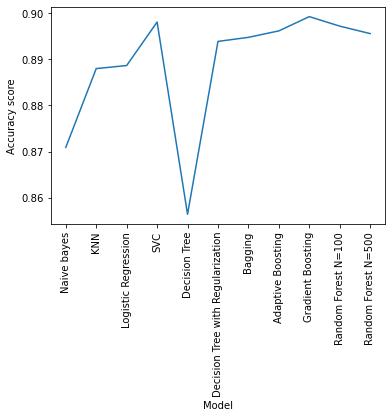

In [127]:
# Countplot of Scores
sns.lineplot(x=Scores['Model'], y=Scores['Accuracy score'], data=Scores, markers=True, dashes=False) 

plt.xticks(rotation=90)
plt.show()

# Conclusion

Scores


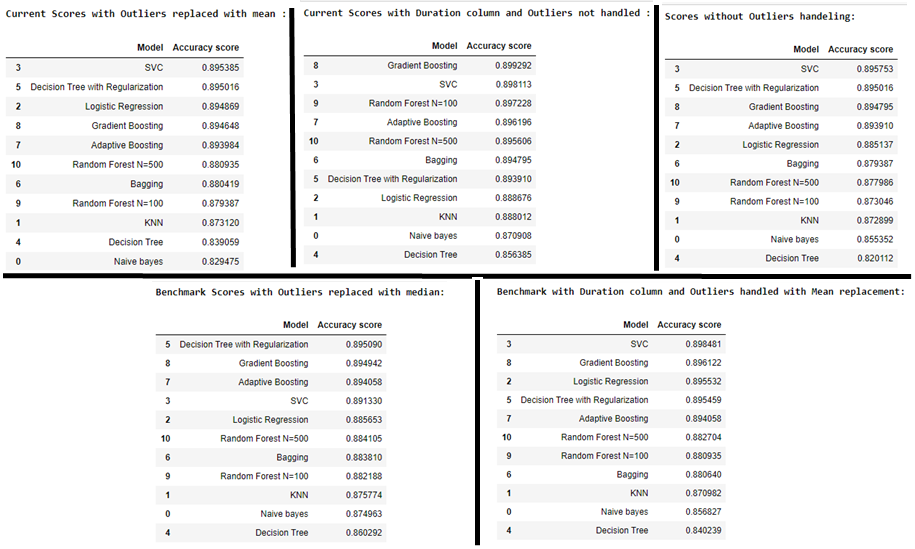

In [128]:
print('\033[1m''Scores')
Image(filename='Scores_img/Combined.PNG',width=1100,height=600) #include Image

## Comments on dataset:
* The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models. 
* The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models. 
* Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
* This situation could have been avoided if the datset was balanced. 
* Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

## Comments on  Models:
* When benchmarking with 'duration' column, Support Vector Classifier achieved close to 90% model accuracy while naive bayes score was 85% accurate.
* SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
* After removing the 'duration' column, The highest model score dropped by 0.4%.
* The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores in a significant way.
* In Decision Trees, Gradient boosting method performed better most of the time for this dataset.
* While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.

## Miscellaneous Comments:
* After trying get_dummies the score did not show significant difference as well. get_dummies step was skipped because the dataset was creating more dimension, which was making the project more computationally intensive.
* If get_dummies step were used, then in production stage if the new dataset turned out to be huge in number of rows then this project would have taken a lot of time to execute.
* Outlier handeling did not make any significant difference in the accuracy scores of models.
* Time complexity of this project was kept at minimum.